<a href="https://colab.research.google.com/github/kamranjaved/Workshop-on-AI-and-Hand-on-training/blob/main/Image%20Classification%20using%20CNN/Cifar10_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CIFAR-10 Classification using CNN
CIFAR is an acronym that stands for the Canadian Institute For Advanced Research and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute.

The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.

0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
These are very small images, much smaller than a typical photograph, and the dataset was intended for computer vision research.

CIFAR-10 is a well-understood dataset and widely used for benchmarking computer vision algorithms in the field of machine learning. The problem is “solved.” It is relatively straightforward to achieve 80% classification accuracy. Top performance on the problem is achieved by deep learning convolutional neural networks with a classification accuracy above 90% on the test dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.callbacks import CSVLogger
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

#Loading Data
**load data to training set and testing set**
This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. See more info at the CIFAR homepage.

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#checking size

In [ ]:
print('x_train shape:  '+ str(x_train.shape))
print('x_test shape: '+ str(x_test.shape))
print('y_train shape: '+ str(y_train.shape[0]))
print('x_test shape: '+ str(x_test.shape[0]))

x_train shape:  (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: 50000
x_test shape: 10000


#showing first images

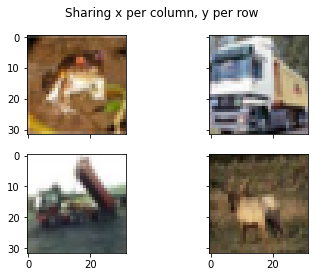

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Sharing x per column, y per row')
ax1.imshow(x_train[0])
ax2.imshow(x_train[1])
ax3.imshow(x_train[2])
ax4.imshow(x_train[3])

for ax in fig.get_axes():
    ax.label_outer()

#Pre-Processing the Data
The first step of any Machine Learning, Deep Learning or Data Science project is to pre-process the data. We will be defining the names of the classes, over which the dataset is distributed. There are 10 different classes of color images of size 32x32. Once we have set the class name. We need to normalize the image so that our model can train faster. The pixel range of a color image is 0–255. We will be dividing each pixel of the image by 255 so the pixel range will be between 0–1. Actually, we will be dividing it by 255.0 as it is a float operation. For the model, we will be using Convolutional Neural Networks (CNN).


In [ ]:
x_train, x_test = x_train / 255, x_test / 255
y_train = y_train.flatten();y_test = y_test.flatten()
print('x_train shape:  '+ str(x_train.shape))
print('x_test shape: '+ str(x_test.shape))

x_train shape:  (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


#Classes for model
There are 10 different classes of color images of size 32x32.

In [ ]:
classes = len(set(y_train))
print(classes)

10


#Building CNN model
A CNN model works in three stages. In the first stage, a convolutional layer extracts the features of the image/data. In the second stage a pooling layer reduces the dimensionality of the image, so small changes do not create a big change on the model. Simply saying, it prevents over-fitting. In the third stage a flattening layer transforms our model in one-dimension and feeds it to the fully connected dense layer. This dense layer then performs prediction of image. A good model has multiple layers of convolutional layers and pooling layers.

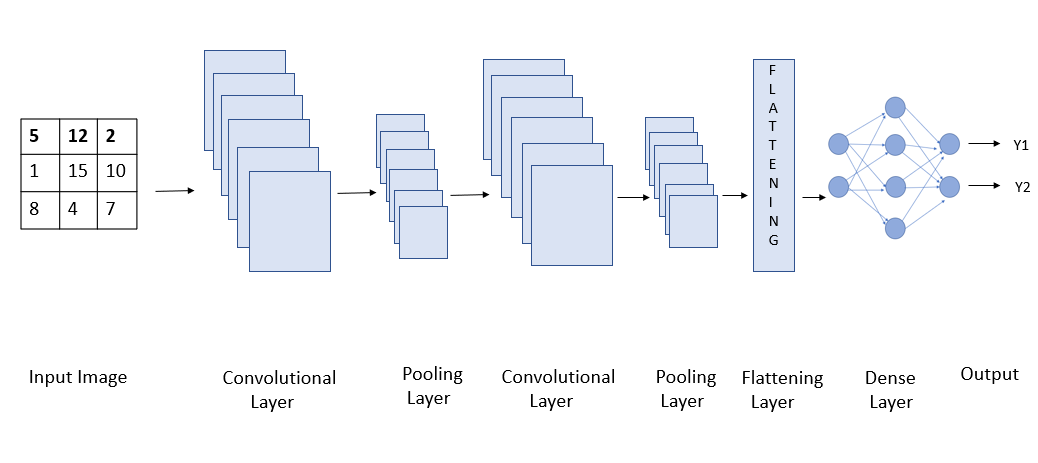

In [ ]:
model = Sequential([
    Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'),

    Conv2D(filters=64,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'),

    Conv2D(filters=128,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'),

    Flatten(),

    Dropout(0.5),

    Dense(units=1024,activation='relu'),

    Dropout(0.5),

    Dense(units=classes,activation='softmax')

    ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 128)       73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 86528)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 86528)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              88605696  
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)             

In [ ]:
csv_logger = CSVLogger('/content/drive/MyDrive/TrainedModels/Cifar10CNN.log', separator=',', append=False)

In [ ]:
num_epochs=15

In [ ]:
result= model.fit(x_train, y_train,validation_data=(x_test, y_test),epochs=num_epochs,callbacks=[csv_logger])

Epoch 1/15
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1248 - accuracy: 0.6002 - val_loss: 0.9592 - val_accuracy: 0.6640
Epoch 2/15
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8969 - accuracy: 0.6860 - val_loss: 0.9048 - val_accuracy: 0.6819
Epoch 3/15
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7138 - accuracy: 0.7507 - val_loss: 0.8835 - val_accuracy: 0.7038
Epoch 4/15
1563/1563 [==============================] - 41s 27ms/step - loss: 0.5429 - accuracy: 0.8097 - val_loss: 0.8890 - val_accuracy: 0.7085
Epoch 5/15
1563/1563 [==============================] - 41s 26ms/step - loss: 0.4192 - accuracy: 0.8552 - val_loss: 0.9388 - val_accuracy: 0.7065
Epoch 6/15
1563/1563 [==============================] - 42s 27ms/step - loss: 0.3288 - accuracy: 0.8877 - val_loss: 0.9723 - val_accuracy: 0.7132
Epoch 7/15
1563/1563 [==============================] - 42s 27ms/step - loss: 0.2720 - accuracy: 0.9085 - val_loss: 1.0361 -

In [ ]:
model.save('/content/drive/MyDrive/TrainedModels/Cifar10CNN.h5')

In [ ]:
model2=load_model('/content/drive/MyDrive/TrainedModels/Cifar10CNN.h5')
history2 = pd.read_csv('/content/drive/MyDrive/TrainedModels/Cifar10CNN.log', sep=',', engine='python')

#Plot the loss

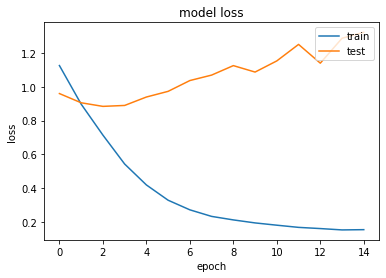

In [ ]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
# ''' for loaded model2 fromdrive'''
# plt.plot(history2['loss'], label='loss')    
# plt.plot(history2['val_loss'], label='loval_lossss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

#Plot the accuracy

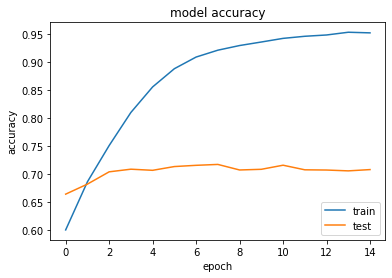

In [ ]:
# Plot the accuracy
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label='val_accuracy')
# ''' for loaded model2 from drive'''
# plt.plot(history2['accuracy'])
# plt.plot(history2['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

#Plot confusion matrix

Text(33.0, 0.5, 'True Label')

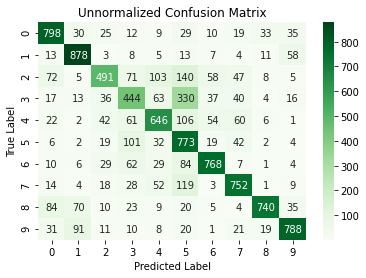

In [ ]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(x_test).argmax(axis=1) # Need to take argmax to get class number with highest probability for each sample
# predictions = model2.predict(x_test).argmax(axis=1)
colormap = confusion_matrix(y_test, predictions)
import seaborn as sns
ax = sns.heatmap(colormap, annot=True, fmt='d', cmap='Greens')
ax.set_title("Unnormalized Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")


# Predications

In [ ]:
def plot(n,g):
  from keras.preprocessing import image
  img=x_test[n]
  x = image.img_to_array(img)
  x=np.expand_dims(x,0)
  image = np.vstack([x])
  prediction = model.predict(image)
  # prediction = model.predict(image) # for model2
  ind = np.argmax(prediction)
  lis=('airplane' ,'automobile', 'bird','cat', 'deer', 'dog',  'frog',  'horse' , 'ship' , 'truck')
  print("predicted image: ", lis[ind])
  g.imshow(img.reshape((32,32,3)))
  g.title.set_text("predicted: "+ str(lis[ind]))

Predicated

predicted image:  cat
predicted image:  automobile
predicted image:  airplane
predicted image:  airplane
predicted image:  frog
predicted image:  frog
predicted image:  automobile
predicted image:  bird


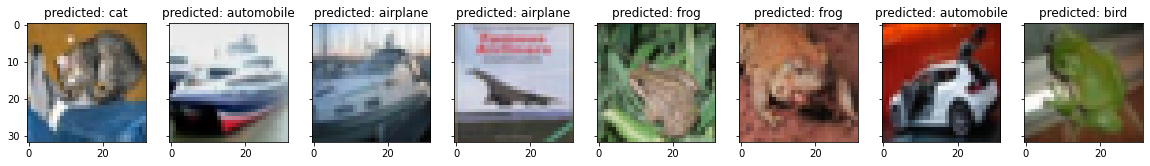

In [ ]:
f, (ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(1, 8, sharey=True,figsize=(20, 20))
print("Predicated\n")
plot(0,ax1)
plot(1,ax2)
plot(2,ax3)
plot(3,ax4)
plot(4,ax5)
plot(5,ax6)
plot(6,ax7)
plot(7,ax8)